# Imports

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Display the top 15 xG overperformers in Ligue 2 or less with 'low' salary

/tmp/ipykernel_1384/3457256064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']


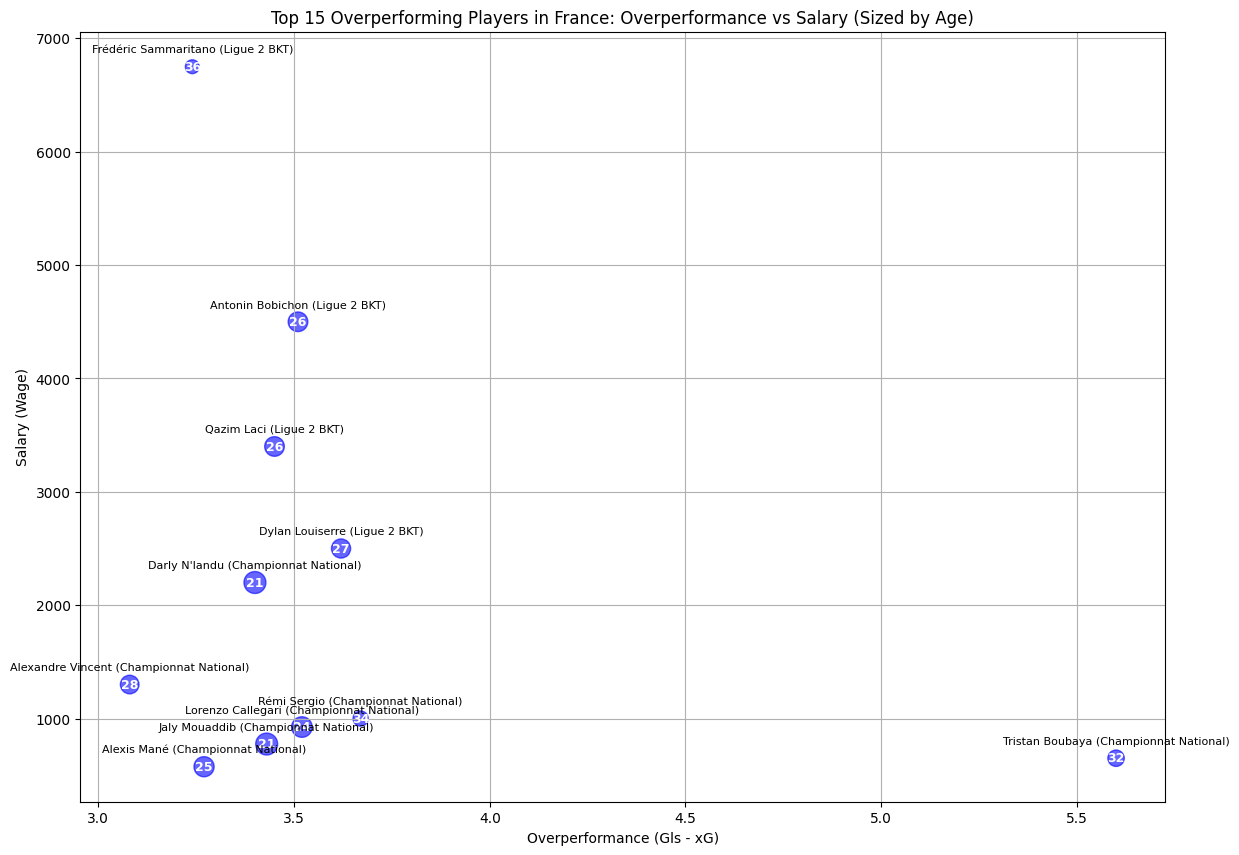

In [8]:
# Retrieve players in french leagues
french_leagues = ["Ligue 2 BKT", "Championnat National", "Ligues régionales"]
df_france = df[df['Division'].isin(french_leagues)]

# Calculate players xG overperformance
df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']

# Select the 15 top overperformers
top_overperformers_france = df_france.nlargest(15, 'Overperformance_Gls_xG')

# Filter out the high salaries
top_overperformers_france = top_overperformers_france[top_overperformers_france['Wage'] <= 50000]

# Create a overperform x salary scatterplot
plt.figure(figsize=(14, 10))

# Calculate point thickness by age 
age_factor = (top_overperformers_france['Age'].max() - top_overperformers_france['Age']) + 10
plt.scatter(top_overperformers_france['Overperformance_Gls_xG'], top_overperformers_france['Wage'], 
            s=age_factor * 10, color='blue', alpha=0.6)

# Add players infos 
for i in range(len(top_overperformers_france)):
    player_name = top_overperformers_france.iloc[i]['Name']
    league_name = top_overperformers_france.iloc[i]['Division']
    age = top_overperformers_france.iloc[i]['Age']
    x = top_overperformers_france.iloc[i]['Overperformance_Gls_xG']
    y = top_overperformers_france.iloc[i]['Wage']
    
    plt.annotate(f"{age}", (x, y), 
                 textcoords="offset points", xytext=(0, 0), ha='center', va='center', 
                 fontsize=9, color='white', weight='bold')

  
    plt.annotate(f"{player_name} ({league_name})", (x, y),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.xlabel('Overperformance (Gls - xG)')
plt.ylabel('Salary (Wage)')
plt.title('Top 15 Overperforming Players in France: Overperformance vs Salary (Sized by Age)')
plt.grid(True)
plt.show()


# French players that overperformed their xG

/tmp/ipykernel_1384/2930744601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_xG_realistic_fra['Overperf_Gls_xG'] = df_filtered_xG_realistic_fra['Goals'] - df_filtered_xG_realistic_fra['xG']
/tmp/ipykernel_1384/2930744601.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperf_Gls_xG', y='Wage', data=top_overperformers_realistic_fra, palette='viridis')


                      Name                       Club  \
1032   Baptiste Santamaria                     Rennes   
754          Yanis Rahmani                      Eibar   
4193       Tristan Boubaya                 Concarneau   
1509          Mahdi Camara              Saint-Étienne   
1755       Dylan Louiserre                      Niort   
1545      Antonin Bobichon                      Nancy   
3820         Darly N'landu               US Avranches   
4624           Alexis Mané                    Sète 34   
5576          Hugo Fargues                    Yverdon   
1617  Frédéric Sammaritano                      Dijon   
5195     Francis Dady Ngoy  Thonon Evian Grand Geneve   
5108      Alexandre Fillon                  FC Annecy   
204     Christopher Nkunku                 RB Leipzig   
3965        Timothée Dieng                Exeter City   
7469           Steve Tanga                   Postojna   

                                      Division  Goals  Overperf_Gls_xG  \
1032         

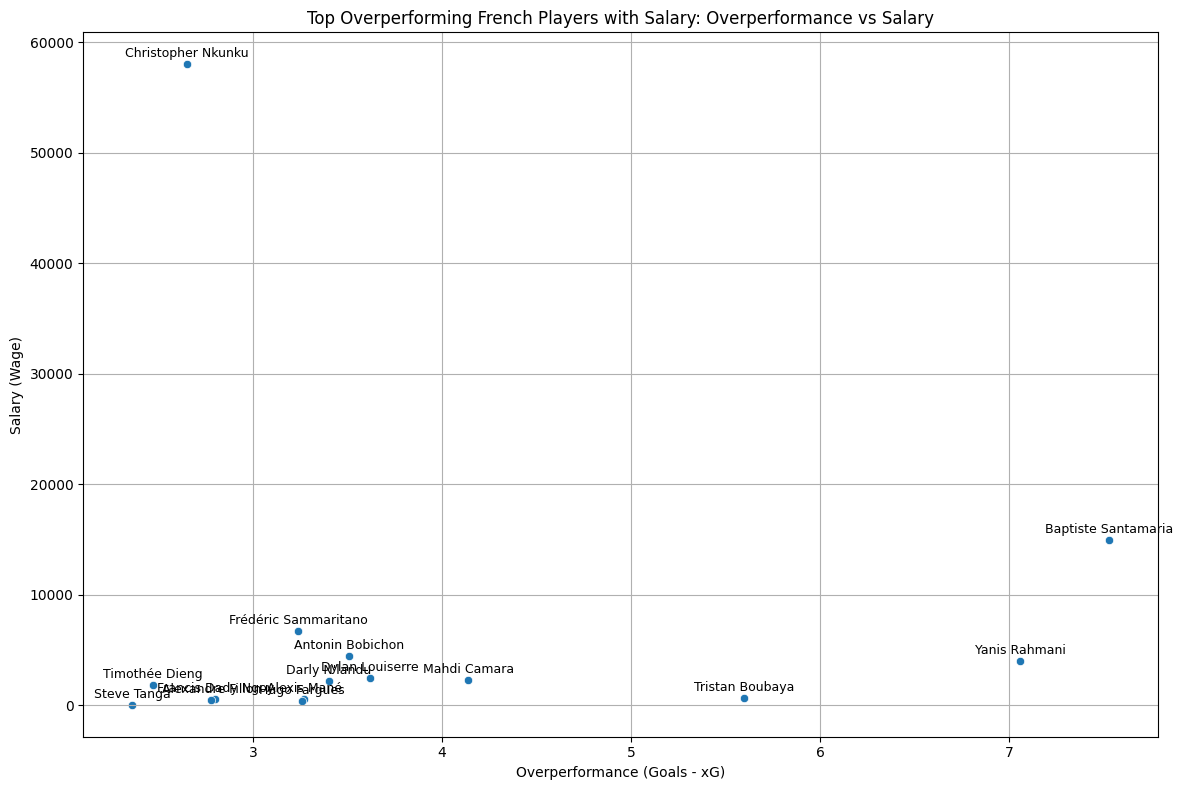

/tmp/ipykernel_1384/2930744601.py:46: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Overperf_Gls_xG', y='Wage', data=top_overperformers_realistic_fra, palette='viridis')


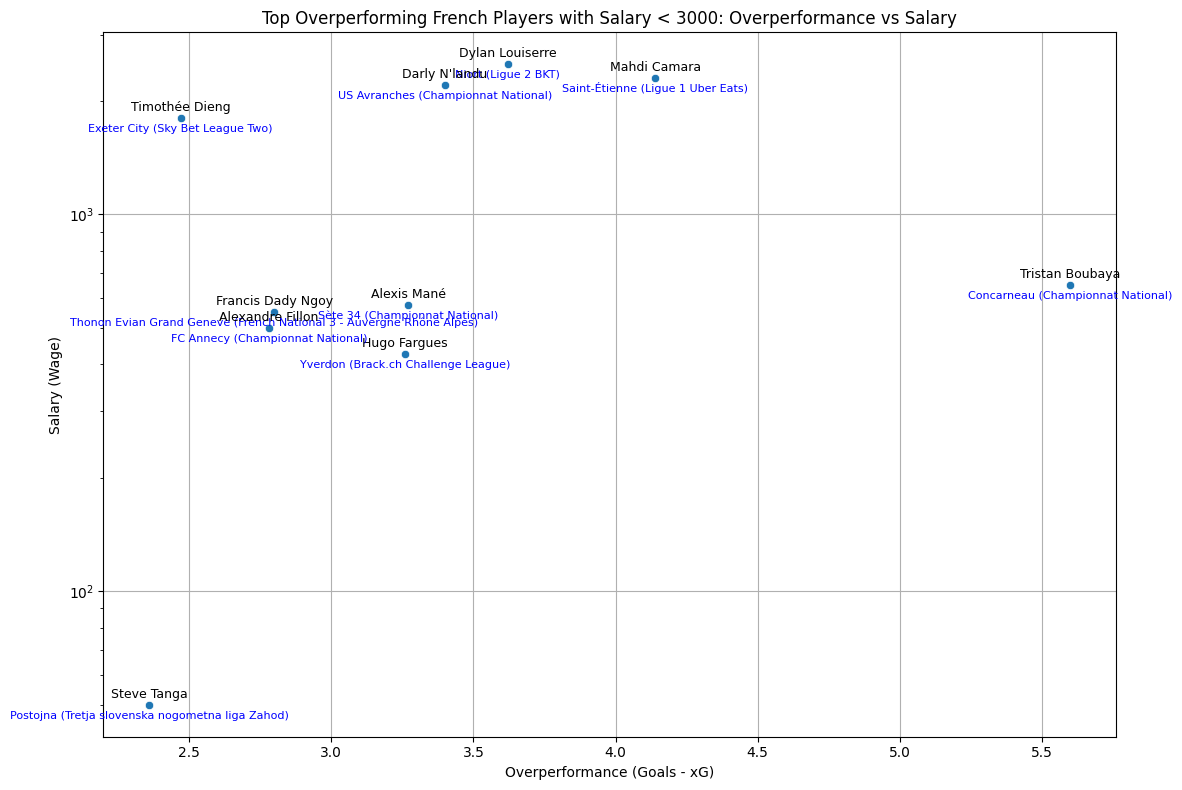

In [18]:
# Retrieve french players
df_filtered_xG = df.copy()  
df_filtered_xG['Difference_Gls_xG'] = df_filtered_xG['Goals'] - df_filtered_xG['xG']
# Try to get more realistic
df_filtered_xG_realistic = df_filtered_xG[df_filtered_xG['Difference_Gls_xG'] <= 0.7 * df_filtered_xG['Goals']]
# Filter for French players
df_filtered_xG_realistic_fra = df_filtered_xG_realistic[df_filtered_xG_realistic['Nationality'] == 'FRA']

# Get the overperformers
df_filtered_xG_realistic_fra['Overperf_Gls_xG'] = df_filtered_xG_realistic_fra['Goals'] - df_filtered_xG_realistic_fra['xG']
top_overperformers_realistic_fra = df_filtered_xG_realistic_fra.nlargest(15, 'Overperf_Gls_xG')

print(top_overperformers_realistic_fra[['Name', 'Club', 'Division', 'Goals', 'Overperf_Gls_xG', 'Wage']])

# Show it with a graph
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperf_Gls_xG', y='Wage', data=top_overperformers_realistic_fra, palette='viridis')

for i in range(len(top_overperformers_realistic_fra)):
    player_name = top_overperformers_realistic_fra.iloc[i]['Name']
    overperformance = top_overperformers_realistic_fra.iloc[i]['Overperf_Gls_xG']
    wage = top_overperformers_realistic_fra.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

plt.title('Top Overperforming French Players with Salary: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Drop the top players based on salary
top_overperformers_realistic_fra = top_overperformers_realistic_fra[top_overperformers_realistic_fra['Wage'] < 3000]
# Create a scatter plot for the top overperformers and use logarithmic scale for better visibility
plt.figure(figsize=(12, 8))
plt.yscale('log')
sns.scatterplot(x='Overperf_Gls_xG', y='Wage', data=top_overperformers_realistic_fra, palette='viridis')
for i in range(len(top_overperformers_realistic_fra)):
    player_name = top_overperformers_realistic_fra.iloc[i]['Name']
    player_club = top_overperformers_realistic_fra.iloc[i]['Club']
    player_division = top_overperformers_realistic_fra.iloc[i]['Division']
    overperformance = top_overperformers_realistic_fra.iloc[i]['Overperf_Gls_xG']
    wage = top_overperformers_realistic_fra.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )
    plt.annotate(
        player_club + ' (' + player_division + ')', 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,-10), 
        ha='center',
        fontsize=8,
        color='blue'
    )
plt.title('Top Overperforming French Players with Salary < 3000: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.grid(True)
plt.tight_layout()
plt.show()